In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

from apl.prep.prep import preprocess, operations
from apl.prep.ohe import fitted_ohe

In [2]:
def get_data():
    from apl.data import read_data
    from apl.prep.prelim import xcolms, ycolm
    from apl.prep.prep import sample
    df = read_data()
    df.drop_duplicates(inplace=True)
    df = df[xcolms+[ycolm]]
    data = sample(df, ycolm, 3, random_state=1234)
    x,y = data, data['Failure']
    return df, x, y

df, xtrain, ytrain = get_data()
ohe = fitted_ohe(operations['oneHotEncode'], df)
preprocessor = preprocess(operations, ohe, scale=True)
xtrain = preprocessor.fit_transform(xtrain)

reading  /home/pranay/Desktop/apple/apl/data/data_exercise2.csv
fitting...
transforming...


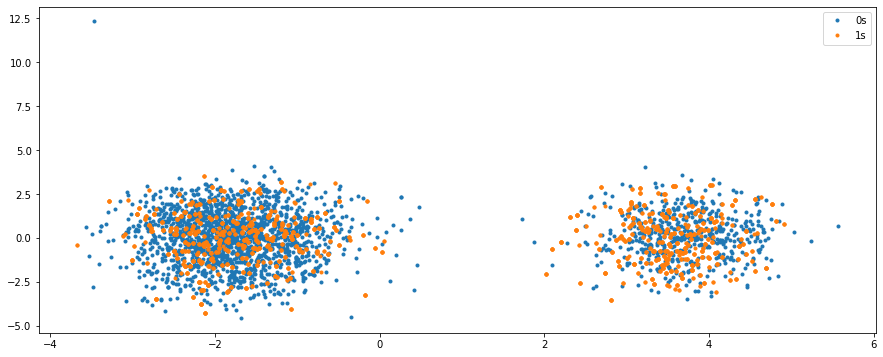

In [3]:
pca = decomposition.PCA(n_components=2)
pca.fit(xtrain)
new = pca.transform(xtrain)

zeros = (ytrain.values==0)
ones = (ytrain.values==1)
zeros = new[zeros]
ones = new[ones]
plt.figure(figsize=(15,6))
plt.plot(zeros[:,0], zeros[:,1], '.', label='0s')
plt.plot(ones[:,0], ones[:,1], '.', label='1s')
plt.legend();

In [13]:
n = zeros[:,0]>1
df = pd.Series(n).value_counts().to_frame()
n = ones[:,0]>1
df[1] = pd.Series(n).value_counts()
df.index = ['<=1','>1']
df.columns = ['healthy(zeros)', 'failed(ones)']
df.T

,<=1,>1
healthy(zeros),1630,514
failed(ones),1236,908


In [16]:
(df/len(xtrain)).T

,<=1,>1
healthy(zeros),0.380131,0.119869
failed(ones),0.288246,0.211754
